In [1]:
#Actividad 6
# Vicente Lavagnino

# imports
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import kagglehub

path = kagglehub.dataset_download('mashlyn/online-retail-ii-uci')
print(path)

foo = path + '/online_retail_II.csv'

df = pd.read_csv(foo, encoding='latin1')

data = df.groupby("Invoice")["StockCode"].apply(list).tolist()
data = data[:50000]

/Users/vicentelavagnino/Desktop/IIC2433-GH/venv_umap/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/Users/vicentelavagnino/.cache/kagglehub/datasets/mashlyn/online-retail-ii-uci/versions/3


In [ ]:
# Recomendaciones: comenzar con un soporte minimo
# usar el algoritmo apriori

In [2]:
# Codificar transacciones con one-hot encoding
from mlxtend.preprocessing import TransactionEncoder

a = TransactionEncoder()
a_data = a.fit(data).transform(data)
df = pd.DataFrame(a_data, columns=a.columns_)
df = df.replace(False,0)
df = df.replace(True,1)
df

/var/folders/tp/1ddrt8cs1ml33c8ysvfd7tfr0000gn/T/ipykernel_40240/1336405594.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(True,1)


,10002,10002R,10080,10109,10120,10123C,10123G,10124A,10124C,10124G,...,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,gift_0001_60,gift_0001_70,gift_0001_80,gift_0001_90,m
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Estrategia de exploración MinSupp con monitoreo del uso de memoria

supports = [0.2, 0.1, 0.05, 0.025]

for support in supports:
    print(f"Support: {support}")
    frequent_itemsets = apriori(df, min_support=support, use_colnames=True)
    print(f"Frecuente itemsets: {len(frequent_itemsets)}")
    print(frequent_itemsets)
    print("\n")

Support: 0.2


/Users/vicentelavagnino/Desktop/IIC2433-GH/venv_umap/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frecuente itemsets: 0
Empty DataFrame
Columns: [support, itemsets]
Index: []


Support: 0.1


/Users/vicentelavagnino/Desktop/IIC2433-GH/venv_umap/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frecuente itemsets: 1
   support  itemsets
0  0.10936  (85123A)


Support: 0.05


/Users/vicentelavagnino/Desktop/IIC2433-GH/venv_umap/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frecuente itemsets: 8
   support  itemsets
0  0.06186   (20725)
1  0.06262   (21212)
2  0.05126   (21232)
3  0.08202   (22423)
4  0.05364   (47566)
5  0.05634   (84879)
6  0.08076  (85099B)
7  0.10936  (85123A)


Support: 0.025


/Users/vicentelavagnino/Desktop/IIC2433-GH/venv_umap/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frecuente itemsets: 100
    support         itemsets
0   0.03470          (20685)
1   0.02850          (20712)
2   0.02666          (20713)
3   0.03170          (20719)
4   0.02780          (20723)
..      ...              ...
95  0.02936          (85152)
96  0.02848            (DOT)
97  0.03922           (POST)
98  0.02650  (21931, 85099B)
99  0.02860  (85099B, 22386)

[100 rows x 2 columns]




In [17]:
df2 = apriori(df, min_support = 0.024, use_colnames = True, verbose = 1)

/Users/vicentelavagnino/Desktop/IIC2433-GH/venv_umap/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 21 combinations | Sampling itemset size 3e 2


/Users/vicentelavagnino/Desktop/IIC2433-GH/venv_umap/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/vicentelavagnino/Desktop/IIC2433-GH/venv_umap/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/vicentelavagnino/Desktop/IIC2433-GH/venv_umap/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/vicentelavagnin

Text(0.5, 0, 'Min Support')

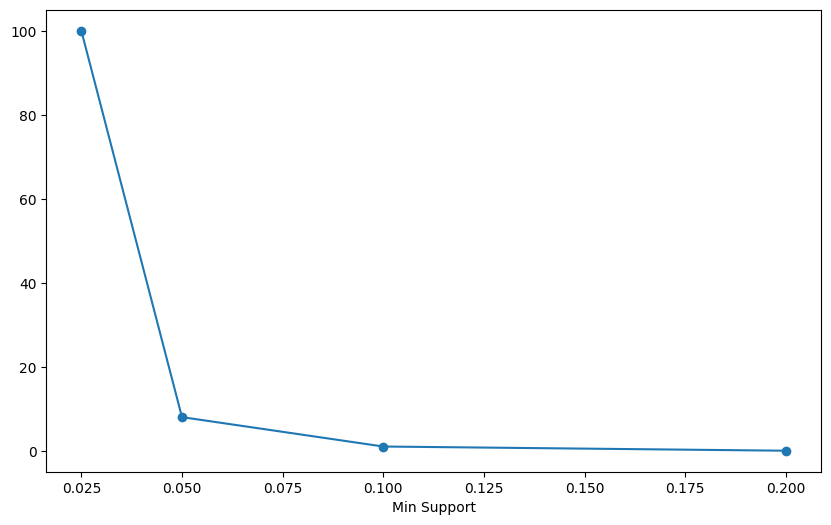

In [11]:
# • Dibuje una curva Min Supp contra Número de itemets frecuentes encontrados en el rango de interés que exploró.

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(supports, [len(apriori(df, min_support=s, use_colnames=True)) for s in supports], marker='o')
plt.xlabel('Min Support')



In [23]:
# Seleccione un valor de Min Supp. Luego busque reglas interesantes ajustando el umbral de confianza. Ajústelo de manera que encuentre al menos 7 reglas.

valor_min_support = 0.024

df_ar = association_rules(df2, metric = "confidence", min_threshold = 0.3)
df_ar[['antecedents','consequents','support','confidence']]



,antecedents,consequents,support,confidence
0,(20725),(20727),0.02416,0.390559
1,(20727),(20725),0.02416,0.508632
2,(21733),(85123A),0.02486,0.697140
3,(21931),(85099B),0.02650,0.564550
4,(85099B),(21931),0.02650,0.328133
5,(85099B),(22386),0.02860,0.354136
6,(22386),(85099B),0.02860,0.633304
